In [7]:
import sys
import os
sys.path.append(os.path.abspath('../..'))


# from scan_engine.status_fields_config_24summ import STATUS_FIELDS_CONFIG
from status_fields_config_oct3v1_brws_250525 import STATUS_FIELDS_CONFIG

from utlis.scan_engine_utlis.scan_eng_big_utlis import log_folder_to_parquet_sep

if __name__ == "__main__":
    base_folder = "/data/big_rim/rsync_dcc_sum/25juneon" #"/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1" #"/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ"  # Replace with your base folder
    # save_path = os.path.join(base_folder, 'paret')
    failed_paths_file = None #'/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/sync_failed_brws.txt'  # File containing failed paths

    force_rescan_rec_files = [
        # ('2023-10-01', '001'),
        # ('2023-10-02', '002'),
        # Add more as needed
    ]
    rescan_threshold_days = 0.001 # 7 days, but guess if i mess up i can just change it to automatically rescan all, smile... #0.1

    log_folder_to_parquet_sep(base_folder, failed_paths_file, STATUS_FIELDS_CONFIG,
                              force_rescan_rec_files=force_rescan_rec_files,
                              rescan_threshold_days=rescan_threshold_days)


Log for 20250519PMCL23L2_enewcone_econe_oldecone saved at /data/big_rim/rsync_dcc_sum/25juneon/2025_06_24/20250519PMCL23L2_enewcone_econe_oldecone/folder_log.parquet
Log for 20250519PMCL23L2_enewcone saved at /data/big_rim/rsync_dcc_sum/25juneon/2025_06_24/20250519PMCL23L2_enewcone/folder_log.parquet
Log for 20250519PMCL23L2_scone saved at /data/big_rim/rsync_dcc_sum/25juneon/2025_06_24/20250519PMCL23L2_scone/folder_log.parquet
Log for 20250407v1l23_ecups saved at /data/big_rim/rsync_dcc_sum/25juneon/2025_06_25/20250407v1l23_ecups/folder_log.parquet
Log for 20250505v123r1 saved at /data/big_rim/rsync_dcc_sum/25juneon/2025_06_25/20250505v123r1/folder_log.parquet
Log for 20250407v1l23_socialclearcup saved at /data/big_rim/rsync_dcc_sum/25juneon/2025_06_25/20250407v1l23_socialclearcup/folder_log.parquet
Log for 20250407v1l23_socialblackcup_2 saved at /data/big_rim/rsync_dcc_sum/25juneon/2025_06_25/20250407v1l23_socialblackcup_2/folder_log.parquet
Log for 20250407v1l23_socialblackcup saved

In [8]:
sys.path.append(os.path.abspath('../..'))
from utlis.scan_engine_utlis.scan_engine_utlis import read_all_parquet_files
# base_folder = "/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1"
all_df = read_all_parquet_files(base_folder)

In [9]:
import pyarrow.compute as pc
from functools import reduce


table = all_df #combined_df
# Filter mir_generate_param == 0 and sync != 3
conditions = [
   # pc.equal(table['mir_generate_param'], '0'),
   pc.equal(table['sync'], '1'),
   pc.not_equal(table['sync'], '3'),
   pc.equal(table['com'], '1'),
   # pc.equal(table['com_vis'], '1'),
   # pc.equal(table['v1'], '1'),
#    pc.equal(table['dannce'], '1'),
   # pc.equal(table['dannce_vis'], '1'),
   # pc.equal(table['social'], '1'),
   # pc.equal(table['mini_6cam_map'], '1'),
   # pc.equal(table['mini_rec_sync_com'], '1'),
   #mini_rec_sync
   # mini_6cam_map
]

filter_mask = reduce(pc.and_, conditions)



# Apply the filter and print the results
filtered_table = table.filter(filter_mask)

# Print each row of the filtered table
print(filtered_table.to_pandas())  # This will display the filtered data in a familiar pandas-like format


  mir_generate_param sync mini_6cam_map dropf_handle com com_vis social  \
0                  1    1             0            0   1       1      0   
1                  1    1             0            0   1       1      0   
2                  1    1             0            0   1       1      1   
3                  1    1             0            0   1       1      1   
4                  1    1             0            0   1       1      1   

  miniscope test after_oxytocin before_oxytocin dannce dannce_vis  \
0         1    0              0               0      1          1   
1         1    0              0               0      1          1   
2         1    0              0               0      1          1   
3         1    0              0               0      1          1   
4         1    0              0               0      1          1   

  mini_rec_sync mini_rec_sync_com                                  rec_file  \
0             0                 0  20250519PMCL23L2_ene

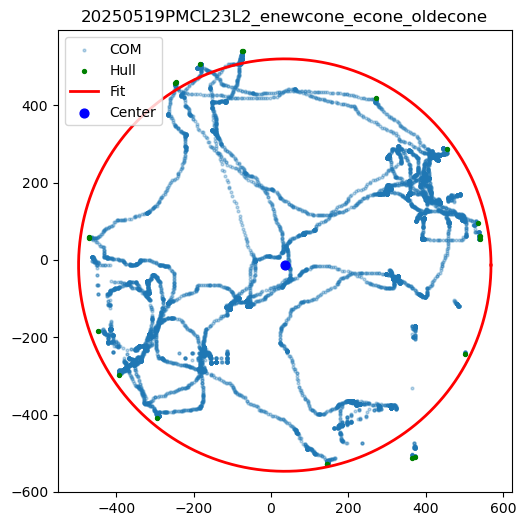

Saved COM circle plot to:
  /data/big_rim/rsync_dcc_sum/25juneon/2025_06_24/20250519PMCL23L2_enewcone_econe_oldecone/vis/com_circle.png


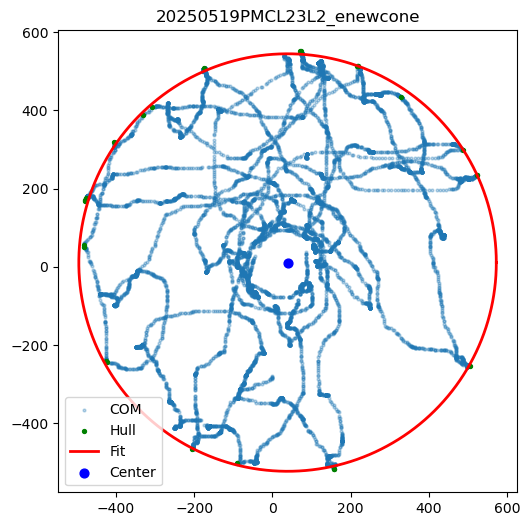

Saved COM circle plot to:
  /data/big_rim/rsync_dcc_sum/25juneon/2025_06_24/20250519PMCL23L2_enewcone/vis/com_circle.png


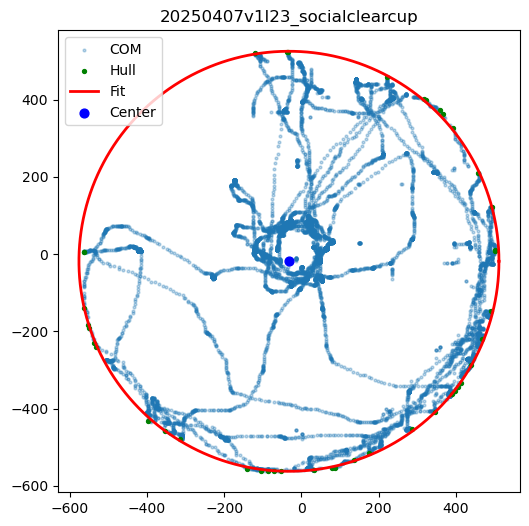

Saved COM circle plot to:
  /data/big_rim/rsync_dcc_sum/25juneon/2025_06_25/20250407v1l23_socialclearcup/vis/com_circle.png


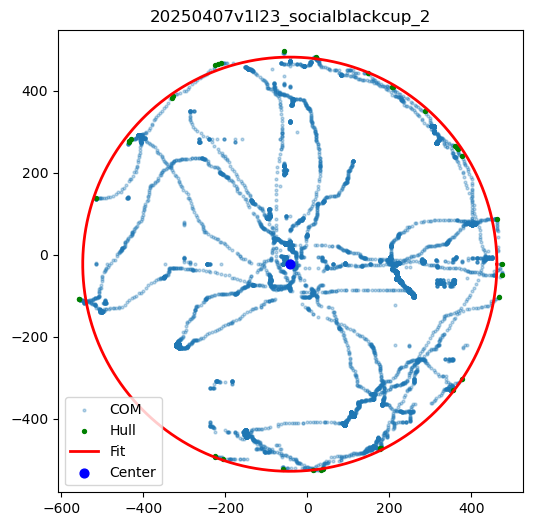

Saved COM circle plot to:
  /data/big_rim/rsync_dcc_sum/25juneon/2025_06_25/20250407v1l23_socialblackcup_2/vis/com_circle.png


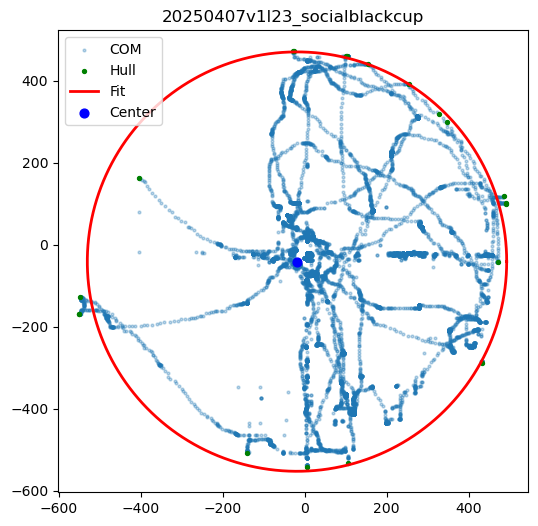

Saved COM circle plot to:
  /data/big_rim/rsync_dcc_sum/25juneon/2025_06_25/20250407v1l23_socialblackcup/vis/com_circle.png


In [10]:
from utlis.vis_valid_utlis.com_trace import plot_com_circle_for_path

rec_paths = filtered_table.column('rec_path').to_pylist()

# 3. Loop through and plot
for path in rec_paths:
    try:
        plot_com_circle_for_path(path)
    except Exception as e:
        print(f"❌ Failed on {path!r}: {e}")

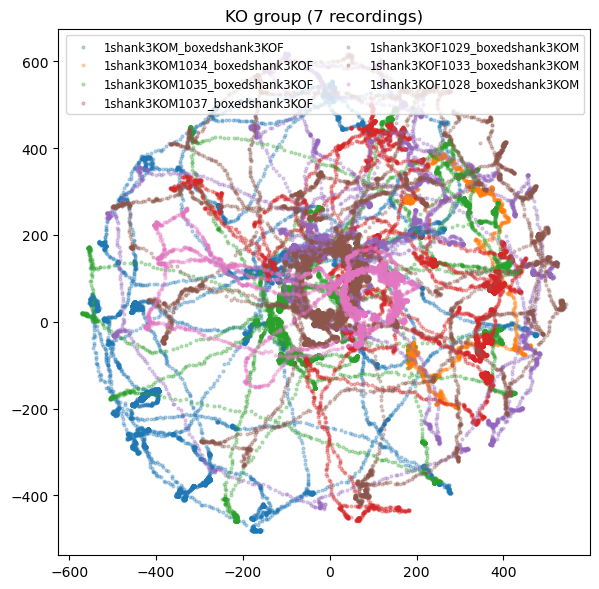

✔️ Saved KO plot to /data/big_rim/rsync_dcc_sum/25Apri_social/2025_05_02/1shank3KOM_boxedshank3KOF/vis/KO_combined.png


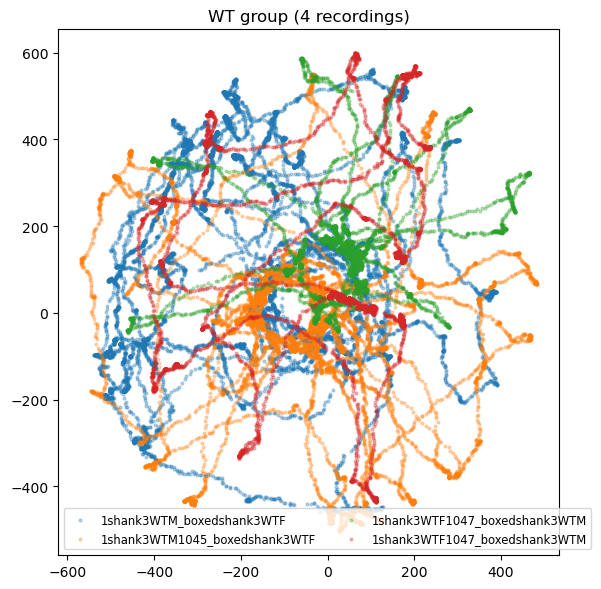

✔️ Saved WT plot to /data/big_rim/rsync_dcc_sum/25Apri_social/2025_05_02/1shank3WTM_boxedshank3WTF/vis/WT_combined.png


In [5]:
from utlis.vis_valid_utlis.com_trace import plot_group_com


# 1. pull out your two columns
rec_paths = filtered_table.column('rec_path').to_pylist()
rec_files = filtered_table.column('rec_file').to_pylist()

# 2. split into two lists
of_paths = [p for p, f in zip(rec_paths, rec_files) if 'KO' in f]
tf_paths = [p for p, f in zip(rec_paths, rec_files) if 'WT' in f]
plot_group_com(of_paths, 'KO')
plot_group_com(tf_paths, 'WT')

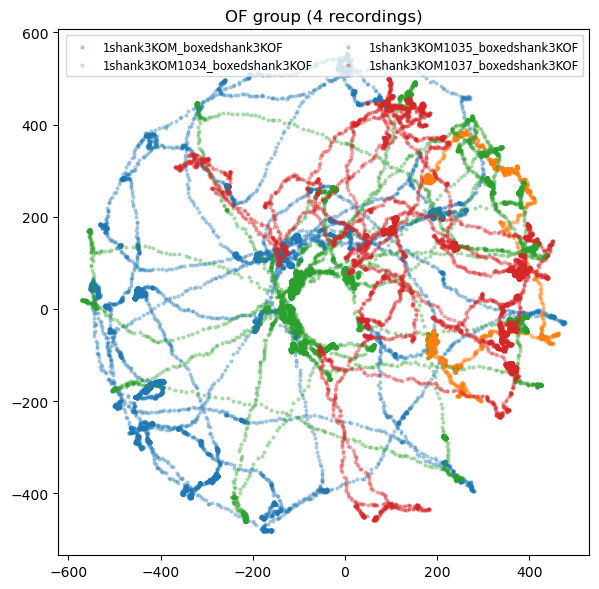

✔️ Saved OF plot to /data/big_rim/rsync_dcc_sum/25Apri_social/2025_05_02/1shank3KOM_boxedshank3KOF/vis/OF_combined.png


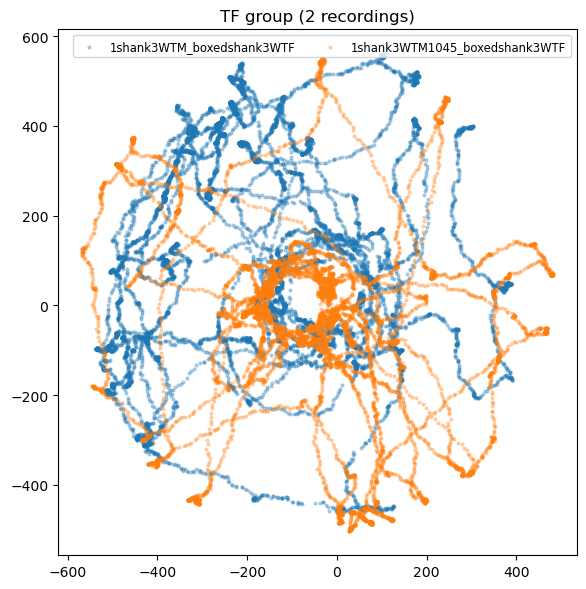

✔️ Saved TF plot to /data/big_rim/rsync_dcc_sum/25Apri_social/2025_05_02/1shank3WTM_boxedshank3WTF/vis/TF_combined.png


In [18]:
from utlis.vis_valid_utlis.com_trace import plot_group_com


# 1. pull out your two columns
rec_paths = filtered_table.column('rec_path').to_pylist()
rec_files = filtered_table.column('rec_file').to_pylist()

# 2. split into two lists
of_paths = [p for p, f in zip(rec_paths, rec_files) if f.endswith('OF')]
tf_paths = [p for p, f in zip(rec_paths, rec_files) if f.endswith('TF')]
plot_group_com(of_paths, 'OF')
plot_group_com(tf_paths, 'TF')

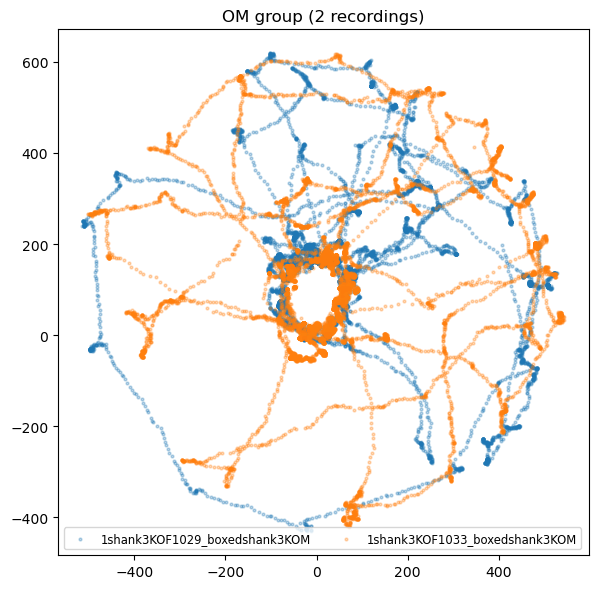

✔️ Saved OM plot to /data/big_rim/rsync_dcc_sum/25Apri_social/2025_05_15/1shank3KOF1029_boxedshank3KOM/vis/OM_combined.png


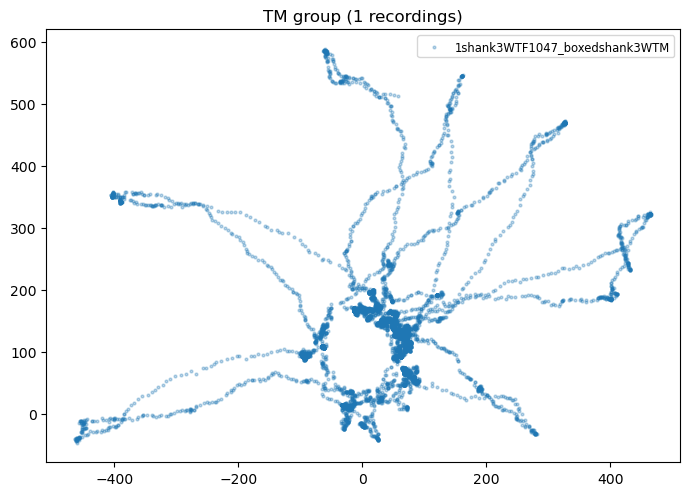

✔️ Saved TM plot to /data/big_rim/rsync_dcc_sum/25Apri_social/2025_05_15/1shank3WTF1047_boxedshank3WTM/vis/TM_combined.png


In [17]:
of_paths = [p for p, f in zip(rec_paths, rec_files) if f.endswith('OM')]
tf_paths = [p for p, f in zip(rec_paths, rec_files) if f.endswith('TM')]
plot_group_com(of_paths, 'OM')
plot_group_com(tf_paths, 'TM')